<a href="https://colab.research.google.com/github/waxxeBinita/Data_explorations/blob/main/Data_explorations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploration A

The company who supplied the Products data in the lecture notes also want an investigation into their website. 
The data is in a similar format to the Products, showing the number of page hits per day, rather than the number of product sales, 
but there are many more web pages than products.

All of the examples download their data from https://tinyurl.com/ChrisCoDV which links to a github repository,
https://github.com/ChrisWalshaw/DataViz.

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv', index_col=0)
data.index = pd.to_datetime(data.index)

In [23]:
#summary of datasets
print(data)
print(data.head())
print(data.tail())
print(data.describe())
print(data.sum())

             001  002  003  004  005  006  007  008  009  010  ...  158  159  \
Date                                                           ...             
2019-01-01  1062   33   67   42    0    4    0    0    1   69  ...    0    0   
2019-01-02   976   41   72   19    2    0    0   14    1   62  ...    5    0   
2019-01-03   956   27   71   28    4    6   11    0    0   64  ...    0    0   
2019-01-04   976   30   57   29    0    0    3    0    2   52  ...    0    2   
2019-01-05   956   45   65   27    4    1    0    0    0   55  ...   12    0   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2019-12-27  1065   46   76   24    0    0    0    2    0   30  ...    4    1   
2019-12-28  1135   55   87   41    1    0    0    0    0   19  ...    0    0   
2019-12-29  1125   64   92   24    0    2    0    0    3   32  ...    0    2   
2019-12-30  1113   59   68   48    9    7    7    5    0   41  ...    5    1   
2019-12-31  1073   66   86   23    0    

In [24]:
# sort the data according to the average of each column, largest first
data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)
print(data.mean())
print(data.head())

015    1279.789041
001    1040.224658
003      74.654795
080      63.991781
155      60.775342
          ...     
138       0.843836
160       0.827397
079       0.824658
081       0.821918
101       0.742466
Length: 167, dtype: float64
             015   001  003  080  155  156  048  002  010  004  ...  159  022  \
Date                                                            ...             
2019-01-01  1184  1062   67   67   39   47   37   33   69   42  ...    0    0   
2019-01-02  1266   976   72   61   59   56   39   41   62   19  ...    0    0   
2019-01-03  1047   956   71   44   58   46   38   27   64   28  ...    0    0   
2019-01-04  1108   976   57   61   39   52   35   30   52   29  ...    2    4   
2019-01-05  1214   956   65   61   40   41   45   45   55   27  ...    0    0   

            126  029  059  138  160  079  081  101  
Date                                                
2019-01-01    2    0    1    2    4    1    2    0  
2019-01-02    2    0    0    1    0 

In [25]:
# similarly sorting for the data according to the maximum value of each row, smallest first
data = data.reindex(data.max(axis=1).sort_values().index)
print(data.max(axis=1))
print(data.head())

Date
2019-02-10    1009
2019-01-03    1047
2019-06-25    1066
2019-04-09    1080
2019-04-15    1081
              ... 
2019-10-28    1494
2019-09-18    1500
2019-11-16    1503
2019-11-25    1513
2019-09-25    1547
Length: 365, dtype: int64
             015   001  003  080  155  156  048  002  010  004  ...  159  022  \
Date                                                            ...             
2019-02-10   932  1009   81   55   50   49   40   42   52   27  ...    1    3   
2019-01-03  1047   956   71   44   58   46   38   27   64   28  ...    0    0   
2019-06-25  1066  1052   89   58   56   58   58   40   58   53  ...    0    0   
2019-04-09  1080  1036   88   79   42   50   45   42   65   13  ...    3    1   
2019-04-15  1081   991   59   43   47   56   47   41   55   33  ...    0    0   

            126  029  059  138  160  079  081  101  
Date                                                
2019-02-10    0    2    1    0    0    0    1    1  
2019-01-03    2    0    0    0   

             001   015
Date                  
2019-02-01   947  1191
2019-02-02  1048  1190
2019-02-03  1076  1211
2019-02-04   974  1253
2019-02-05  1021  1169


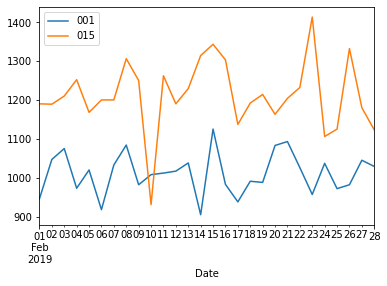

In [36]:
selected = data.columns[data.mean() > 1000]

data = data[selected]
print(data.head())
data.plot.line()
plt.show()

Filtering the data for these two pages by name and creating a line plot showing the page hits per day. 
Almost every day one of the pages has more hits than the other … except for one day in february when 015 hits less than 001.

             001   015
Date                  
2019-02-10  1009   932
2019-01-03   956  1047
2019-06-25  1052  1066
2019-04-09  1036  1080
2019-04-15   991  1081
             015   001  003  080  155  156  048  002  010  004  ...  159  022  \
Date                                                            ...             
2019-02-10   932  1009   81   55   50   49   40   42   52   27  ...    1    3   
2019-01-03  1047   956   71   44   58   46   38   27   64   28  ...    0    0   
2019-06-25  1066  1052   89   58   56   58   58   40   58   53  ...    0    0   
2019-04-09  1080  1036   88   79   42   50   45   42   65   13  ...    3    1   
2019-04-15  1081   991   59   43   47   56   47   41   55   33  ...    0    0   

            126  029  059  138  160  079  081  101  
Date                                                
2019-02-10    0    2    1    0    0    0    1    1  
2019-01-03    2    0    0    0    0    3    3    0  
2019-06-25    2    0    2    0    0    0    0    0  
2019-0

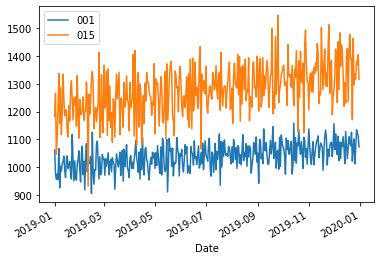

In [26]:
selected = ['001', '015']

print(data[selected].head())
print(data.head())

data[selected].plot.line()
plt.show()

Adding a column which shows the average page hits for the entire site. 
Selecting the columns containing two most popular pages and the site average and use the resulting dataframe to draw a line plot results that the average page hits for the entire site is very low comparatively.

             001  002  003  004  005  006  007  008  009  010  ...  159  160  \
Date                                                           ...             
2019-01-01  1062   33   67   42    0    4    0    0    1   69  ...    0    4   
2019-01-02   976   41   72   19    2    0    0   14    1   62  ...    0    0   
2019-01-03   956   27   71   28    4    6   11    0    0   64  ...    0    0   
2019-01-04   976   30   57   29    0    0    3    0    2   52  ...    2    0   
2019-01-05   956   45   65   27    4    1    0    0    0   55  ...    0    0   

            161  162  163  164  165  166  167    Average  
Date                                                      
2019-01-01    0   10    2    2    2    0    0  17.994012  
2019-01-02    7    0    0    0    0    1    3  18.383234  
2019-01-03    0    6    0    0    3    0    0  16.353293  
2019-01-04    0    0    0    0    0    0    7  16.347305  
2019-01-05    4    0    0    0    0    5    2  17.940120  

[5 rows x 168 columns]
  

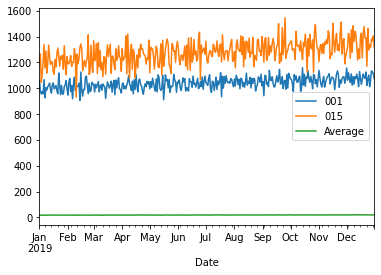

In [34]:
data['Average'] = data.mean(axis=1)
print(data.head())

selected = ['001', '015', 'Average']

data = data[selected]
print(data.head())

data.plot.line()
plt.show()

Finally restricting the rows to just show February and creating a line plot of the result.

             001   015    Average
Date                             
2019-02-01   947  1191  17.209581
2019-02-02  1048  1190  17.982036
2019-02-03  1076  1211  17.670659
2019-02-04   974  1253  17.670659
2019-02-05  1021  1169  17.736527


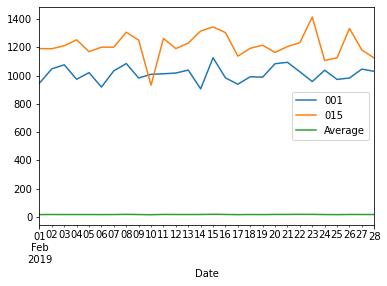

In [35]:
data = data.loc[pd.to_datetime('2019-02-01'): pd.to_datetime('2019-02-28')]
print(data.head())

data.plot.line()
plt.show()
#using runtime- run all to make sure the dataframe are plotted well.